# Linear Regression Tutorial #
This notebook is based on the tutorial at: https://youtu.be/QQ6faGxQ9hM?si=8JN3n4k_R0n4dcSj  <br>
It teaches us about Linear regression and how to use it.<br>
<br>
Github for the tutorial is: https://github.com/marcopeix/datasciencewithmarco <br>
<br>
The Data for this tutorial is included in the above repository.  It seems to come from other sources we have seen, ie. Abalone anyone?
<br>

## Theory ##

Linear Regression Equation:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

And for Multiple Linear Regression, that just extends to become:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p + \epsilon
$$

Error Function being Minimized:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

![Linear Regression Visualization](./error_visualization.png)

Looking for the square of the blue lines to be the smallest possible for the straight line we create (blue)

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
%matplotlib inline

In [2]:
data = pd.read_csv("./data/Advertising.csv", index_col =0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Simple Linear Regression ###

Text(0, 0.5, 'Sales ($)')

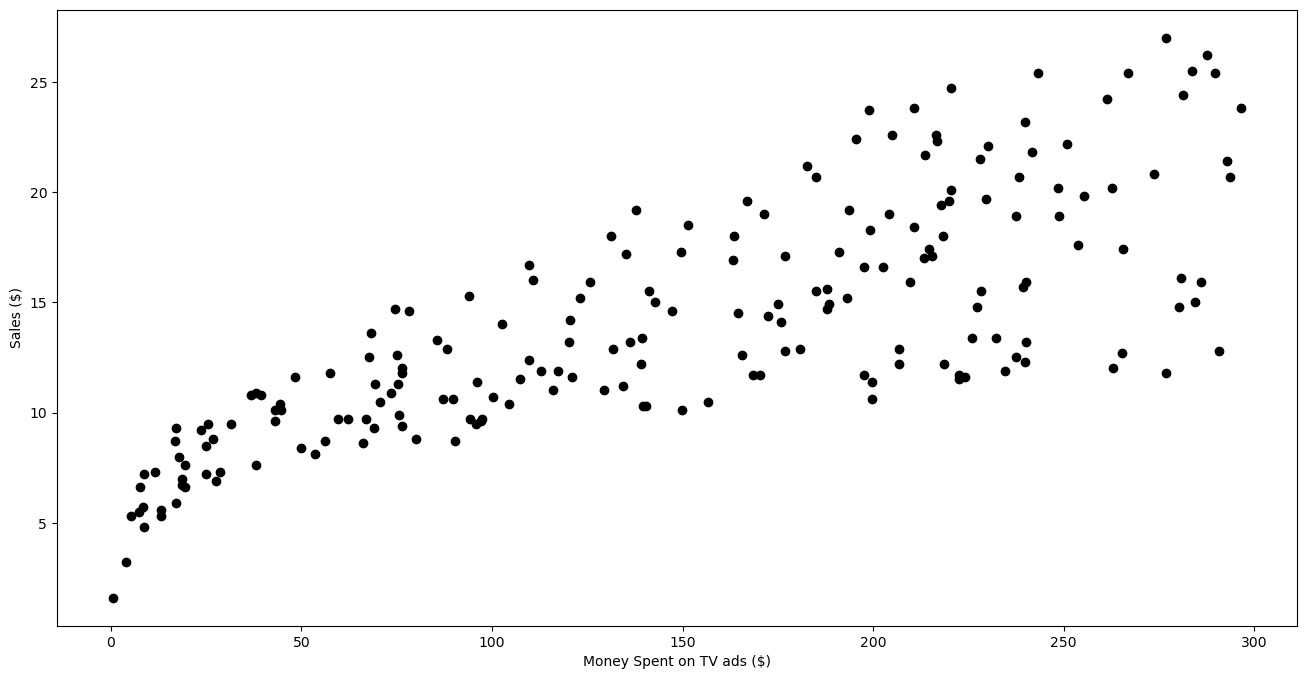

In [3]:
plt.figure(figsize=(16,8))
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel('Money Spent on TV ads ($)')
plt.ylabel('Sales ($)')

In [4]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

print(f"The linear model is \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The linear model is 
 Y = 7.032593549127694 + 0.04753664043301976*TV


Text(0, 0.5, 'Sales ($)')

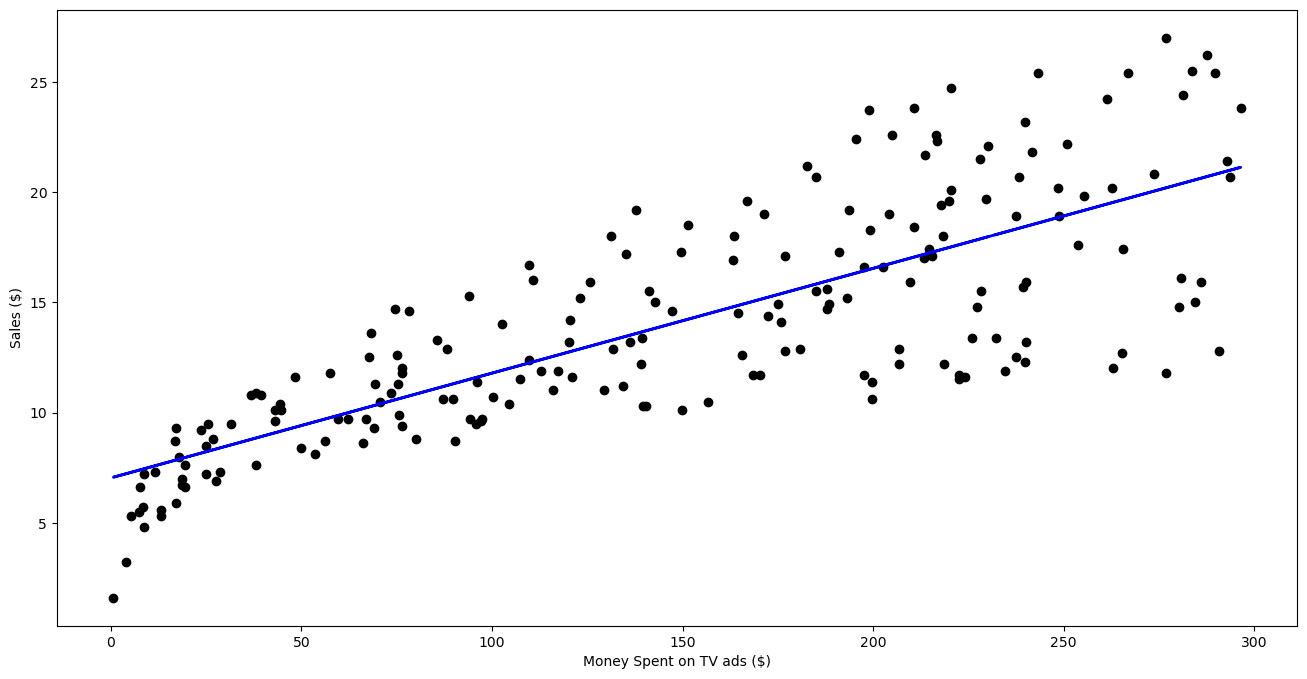

In [5]:
predictions = reg.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X, y, c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.xlabel('Money Spent on TV ads ($)')
plt.ylabel('Sales ($)')

#### Evaluate the Model using the Statistics model libary

In [6]:
X = data['TV']
y = data['sales']

exog = sm.add_constant(X)
estimator = sm.OLS(y, exog).fit()

print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.47e-42
Time:                        00:40:42   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

The R-Squared is .61, which means that only 61% of the variability is captured in our linear regression model, not great.<br>
The F-statistic is 312, which is much larger than 1, indicating that this is actually a pretty good model (although on a small sample set really)<br>
The P value is 0.00, which is less than 0.5, which means this variable, TV, is relevant to predicting the sales.

## Multiple Linear Regression

In [7]:
Xs = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

print(f"The linear model is \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")

The linear model is 
 Y = 2.9388893694594085 + 0.04576464545539761*TV + 0.18853001691820456*radio + -0.00103749304247632*newspaper


In [8]:
X=np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
estimator = sm.OLS(y, exog).fit()

print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        00:40:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Within this summary, we achieved R-Squared of 0.897, which means nearly 90% of the variability is described with this line. <br>
We also achieved an F-statistic of 570, which is even higher than the previous.  This indicates a very good model.<br>
The P values for x1 (TV) and x2 (radio) are both 0.00 or below 0.5, which means they are good predictors of the target variable (sales).<br>
However, the P value for x3 (newspaper) is 0.86, or above 0.5, which means that is not a good predictor and could have been left out of our linear regression analysis.

#### But Why didn't we plot the multiple linear regression? ####
We added dimensions.  In a 2D plot, we are plotting the input variable (X) to the target variable (Y).  When we add other variables, we are adding depth to the graph with a 2nd input and then into the 4th dimension with the 3rd input.  We can't graph that.<br>
<br>
But since the x3 (newspaper) should not have been included per our statistical analysis afterward, lets do it with just TV and Radio and make a 3D plot!

In [9]:
Xs = data.drop(['sales', 'newspaper'], axis=1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

print(f"The linear model is \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio")

The linear model is 
 Y = 2.9210999124051362 + 0.04575481510107615*TV + 0.1879942266203092*radio


In [10]:
X=np.column_stack((data['TV'], data['radio']))
y = data['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
estimator = sm.OLS(y, exog).fit()

print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.83e-98
Time:                        00:40:42   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

#### Make the predictions with the newly trained model ####

In [11]:
predictions = reg.predict(Xs)
print(predictions)

[[20.55546463]
 [12.34536229]
 [12.33701773]
 [17.61711596]
 [13.22390813]
 [12.51208449]
 [11.71821241]
 [12.10551553]
 [ 3.7093792 ]
 [12.55169696]
 [ 7.0358597 ]
 [17.25652015]
 [10.60866187]
 [ 8.81095051]
 [18.44466773]
 [20.82891539]
 [12.90386507]
 [23.24107626]
 [ 9.94121476]
 [14.15384619]
 [18.12139161]
 [14.74206357]
 [ 6.51417168]
 [16.54402663]
 [ 8.14035215]
 [15.6080206 ]
 [14.96769383]
 [17.0463346 ]
 [19.39954145]
 [ 9.15929748]
 [21.64292187]
 [11.35791808]
 [ 7.65045928]
 [18.83346334]
 [ 7.56302763]
 [16.99280099]
 [23.36720719]
 [15.6258994 ]
 [ 9.91257829]
 [20.4405801 ]
 [16.37872122]
 [17.29870935]
 [21.5621537 ]
 [13.96692266]
 [ 8.9009974 ]
 [15.16263814]
 [ 8.88644967]
 [21.69944046]
 [16.28690268]
 [ 8.18162949]
 [12.64569407]
 [ 9.31962792]
 [20.66180115]
 [19.96126242]
 [20.35512357]
 [21.30864743]
 [ 8.53774783]
 [12.76239488]
 [21.89072858]
 [18.10746914]
 [ 5.74497097]
 [22.90418658]
 [16.78413768]
 [13.18474853]
 [16.96570907]
 [ 7.82652846]
 [ 8.98703

In [21]:
Xs.head()

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


#### Make a 3D plot of TV and Radio to Sales

In [ ]:
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

x1_range = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 20)
x2_range = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_mesh = reg.predict(X_mesh).reshape(x1_mesh.shape)

# Create the Plotly figure
fig = go.Figure()

# Add the scatter plot of actual data points
fig.add_trace(go.Scatter3d(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    z=y,
    mode='markers',
    marker=dict(size=10, colorscale='Viridis', opacity=0.8),
    name='Actual Data'
))

# Add the regression plane
# fig.add_trace(go.Surface(
#     x=x1_mesh,
#     y=x2_mesh,
#     z=y_mesh,
#     colorscale='oranges',
#     opacity=0.3,
#     showscale=False,
#     name='Regression Plane'
# ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Standardized TV (Predictor 1)',
        yaxis_title='Standardized Radio (Predictor 2)',
        zaxis_title='Target Variable, Sales',
    ),
    title='Interactive 3D Plot of Multiple Linear Regression',
    showlegend=True
)

# Show the plot
fig.show()

c:\Users\JoeDavis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

